# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [44]:
# Your code here.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

In [9]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

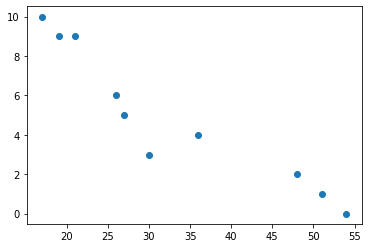

In [15]:
# Your code here.
#plt.scatter(x = "Highway MPG", y = "City MPG", s = "Combined MPG", c = 'CO2 Emission Grams/Mile', data = vehicles, alpha = 0.5)
#plt.show()

plt.scatter(x = 'Age', y = 'Tardies', data = student_data, alpha = 1)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [16]:
# Your response here. 
# Yes, the lower the age the more the person is susceptible to be late. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [20]:
# Your response here.
#correlation:

print(student_data.corr())

#covariance:

print(student_data.cov())

## Correlation and Covariance are both terms that are measuring the relation between two variables, the main difference is that correlation values are standardized (from -1 to 1) while covariance values are on the number's scale. 

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [37]:
# Your response here.
lm = linear_model.LinearRegression()

x = student_data[['Age']]
y = student_data['Tardies']

model = lm.fit(x,y)

predictions = lm.predict(x)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)
print("R Squared: ", lm.score(x,y))

print(predictions)

Intercept:  12.888803363135768
Coef:  [-0.24282077]
R Squared:  0.8820265558250109
[ 8.76085026  0.50494405  6.33264255  7.78956717  4.14725561  1.23340636
  8.27520872  6.57546332 -0.22351827  5.60418024]


In [40]:
predicted_tardies = list(predictions)
predicted_tardies

[8.760850257564094,
 0.5049440464207464,
 6.332642548404286,
 7.789567173900171,
 4.1472556101604585,
 1.23340635916869,
 8.275208715732132,
 6.575463319320267,
 -0.2235182663271953,
 5.604180235656344]

In [41]:
predicted_student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': predicted_tardies})

Plot your regression model on your scatter plot.

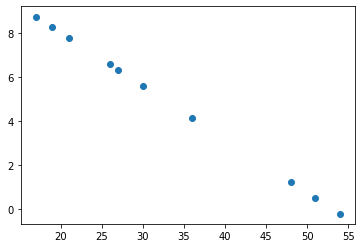

In [42]:
# Your code here.

plt.scatter(x = 'Age', y = 'Tardies', data = predicted_student_data, alpha = 1)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 

# The model has a 0,88 R squared value and was built upon the dataset of the coding bootcamp. F
# For this bootcamp we can say that age is a good predictor of tardiness but since the dataset is very short it might not be accurate for another population.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [47]:
# Import any libraries you may need & the data

ds = pd.read_csv('vehicles.csv')

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [72]:
# Your response here.

ds[['Year','Cylinders','Fuel Barrels/Year','Fuel Cost/Year','Combined MPG','CO2 Emission Grams/Mile']].corr()

# Most important variable: fuel barrels/year. 
# Least important variable : year

,Year,Cylinders,Fuel Barrels/Year,Fuel Cost/Year,Combined MPG,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,-0.091913,0.204751,-0.222300
Cylinders,0.082469,1.000000,0.739517,0.778153,-0.698648,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,0.916208,-0.909743,0.986189
Fuel Cost/Year,-0.091913,0.778153,0.916208,1.000000,-0.875185,0.930865
Combined MPG,0.204751,-0.698648,-0.909743,-0.875185,1.000000,-0.926229
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,0.930865,-0.926229,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [76]:
# Your response here. 
Y = ds['CO2 Emission Grams/Mile']
X = ds[['Cylinders','Fuel Barrels/Year','Fuel Cost/Year','Combined MPG']]
lm = LinearRegression()
model = lm.fit(X,Y)

predictions  = lm.predict(X)

## Multiple regression

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [77]:
# Your response here. 
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

# Most important variable is Fuel Barrels/Year, since it has the highest slope and correlation as seen on the previous exercise.

Intercept:  131.15632475419295
Coef:  [ 1.04483633 19.62713308  0.029393   -3.16658852]


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [79]:
# Your code here.
error_data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

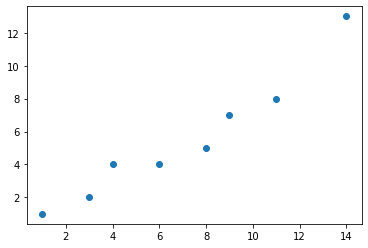

In [85]:
# Your code here.
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

plt.scatter(x = 'X', y = 'Y', data = error_data, alpha = 1)
plt.show()

In [86]:
lm = linear_model.LinearRegression()

x = error_data[['X']]
y = error_data['Y']

model = lm.fit(x,y)

predictions = lm.predict(x)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)
print("R Squared: ", lm.score(x,y))

print(predictions)

Intercept:  -0.43939393939393945
Coef:  [0.84848485]
R Squared:  0.9316696375519905
[ 0.40909091  2.10606061  2.95454545  4.65151515  6.34848485  7.1969697
  8.89393939 11.43939394]


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
# It shows that there is a positive relationship between the two variables.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Intercept:  -0.028037383177569097
Coef:  [0.71495327]
R Squared:  0.9723364485981308
[0.68691589 2.11682243 4.26168224 5.69158879 6.40654206 7.8364486 ]


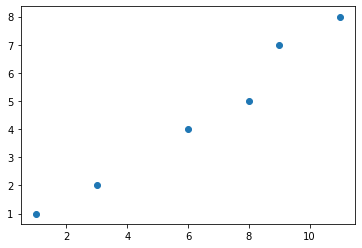

In [90]:
# Your response here. 
error_data_new = pd.DataFrame({'X': [1,3,6,8,9,11], 'Y': [1,2,4,5,7,8]})

x = error_data_new[['X']]
y = error_data_new['Y']

model = lm.fit(x,y)

predictions = lm.predict(x)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)
print("R Squared: ", lm.score(x,y))

print(predictions)

plt.scatter(x = 'X', y = 'Y', data = error_data_new, alpha = 1)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# After removing the outliers the model seems more precise but the population of the sample is too small to be able to make a precise model removing outliers.